In [21]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import seaborn as sns
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('coronavirus_data_30Mar.csv')

data

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
17199,2020-03-25,Zimbabwe,NaN,-20.0,30.0,3.0,0.0,1.0
17200,2020-03-26,Zimbabwe,NaN,-20.0,30.0,3.0,0.0,1.0
17201,2020-03-27,Zimbabwe,NaN,-20.0,30.0,5.0,0.0,1.0
17202,2020-03-28,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0


In [22]:
data.rename(columns = {'Country/Region':'Country'}, inplace = True)
data.rename(columns = {'Province/State':'State'}, inplace = True)
 
print(data.columns)

Index(['Date', 'Country', 'State', 'Lat', 'Long', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')


In [23]:
group = data.groupby('Country').sum()
for x in group:
    print(x)

Lat
Long
Confirmed
Recovered
Deaths


In [24]:
group = group.drop(columns=['Lat','Long'])

In [25]:
top_death = group.loc[group['Deaths'] > 10000]

In [26]:
top_death

,Confirmed,Recovered,Deaths
Country,,,
China,4022318.0,2233848.0,139177.0
France,312815.0,35535.0,14787.0
Iran,441464.0,144127.0,28716.0
Italy,1003558.0,115367.0,92510.0
Spain,558818.0,66895.0,38399.0
US,736989.0,7150.0,11347.0


In [27]:
group.loc[group['Recovered'] > 100000]

,Confirmed,Recovered,Deaths
Country,,,
China,4022318.0,2233848.0,139177.0
Iran,441464.0,144127.0,28716.0
Italy,1003558.0,115367.0,92510.0


In [28]:
group.loc[group['Deaths'] == 0]

,Confirmed,Recovered,Deaths
Country,,,
Antigua and Barbuda,47.0,0.0,0.0
Bahamas,71.0,6.0,0.0
Barbados,188.0,0.0,0.0
Belarus,1163.0,261.0,0.0
Belize,12.0,0.0,0.0
Benin,53.0,0.0,0.0
Bhutan,38.0,0.0,0.0
Burma,26.0,0.0,0.0
Cambodia,1043.0,110.0,0.0


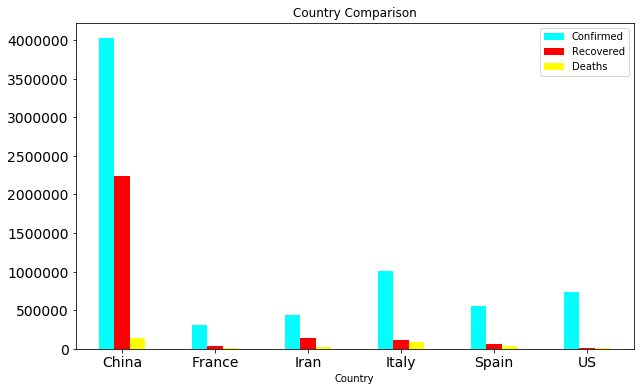

In [30]:
top_death.plot(kind='bar', rot=0, figsize=(10, 6), fontsize=14, color=['cyan','red','yellow'],
               title='Country Comparison');

In [31]:
graph1 = top_death.drop(columns=['Confirmed','Recovered'])

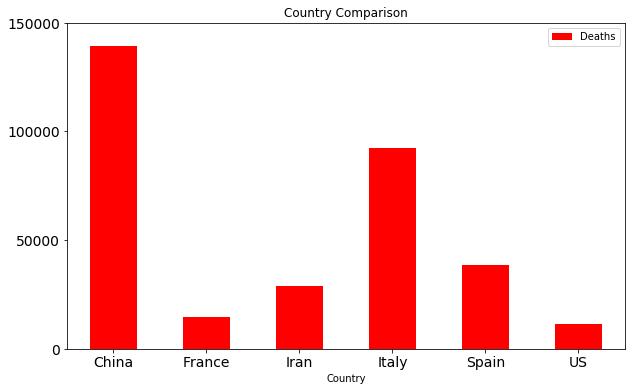

In [78]:
graph1.plot(kind='bar', rot=0, figsize=(10, 6), fontsize=14, color='red',
               yticks=[0, 50000, 100000, 150000],
               title='Country Comparison');

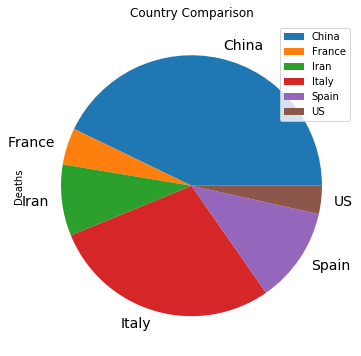

In [81]:
graph1.plot(kind='pie', y = 'Deaths', rot=0, figsize=(10, 6), fontsize=14,
               title='Country Comparison');

In [84]:
china = data[(data.Country == 'China')]
china = china.drop(columns=['Confirmed','Lat','Long','Recovered'])
china = china.groupby('Date').sum()
china



,Deaths
Date,
2020-01-22,17.0
2020-01-23,18.0
2020-01-24,26.0
2020-01-25,42.0
2020-01-26,56.0
...,...
2020-03-25,3285.0
2020-03-26,3291.0
2020-03-27,3296.0


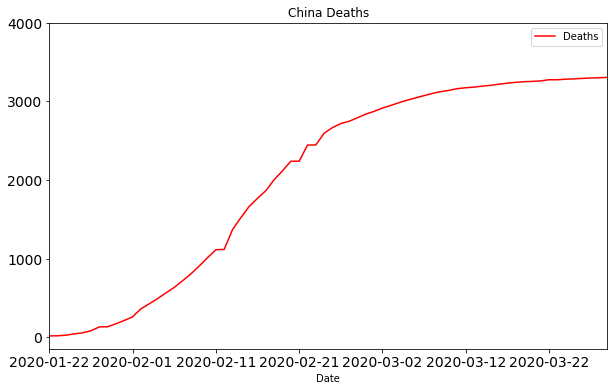

In [86]:
china.plot(kind='line',  rot=0, figsize=(10, 6), fontsize=14, color='red',
               yticks=[0, 1000, 2000, 3000, 4000],
               title='China Deaths');

In [54]:
uk = data[(data.Country == 'United Kingdom') & (data.State.isna())]
uk = uk.drop(columns=['Confirmed','Lat','Long','Recovered'])
uk

,Date,Country,State,Deaths
16048,2020-01-22,United Kingdom,NaN,0.0
16049,2020-01-23,United Kingdom,NaN,0.0
16050,2020-01-24,United Kingdom,NaN,0.0
16051,2020-01-25,United Kingdom,NaN,0.0
16052,2020-01-26,United Kingdom,NaN,0.0
...,...,...,...,...
16111,2020-03-25,United Kingdom,NaN,465.0
16112,2020-03-26,United Kingdom,NaN,578.0
16113,2020-03-27,United Kingdom,NaN,759.0
16114,2020-03-28,United Kingdom,NaN,1019.0


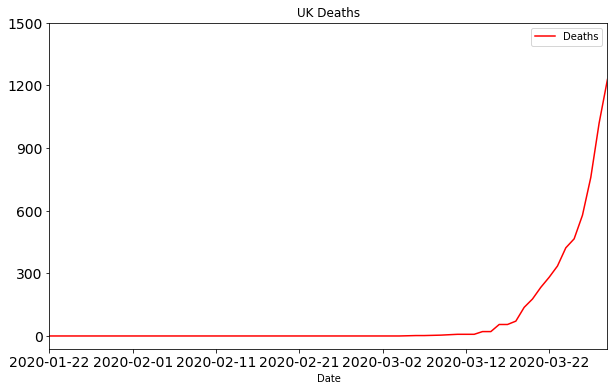

In [58]:
uk.plot(kind='line', y='Deaths',x='Date', rot=0, figsize=(10, 6), fontsize=14, color='red',
               yticks=[0, 300, 600, 900, 1200, 1500], 
               title='UK Deaths');